# Ophelia Sin's Fall 2022 Data Science Intern Challenge 

# Question 1

In [2]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read dataset into panda dataframe
df = pd.read_csv("/Users/opheliasin/shopify-fall022-ds-challenge/intern_challenge_dataset.csv")

## Question 1a:

Since the AOV is based on the column ```order amount```, I first reviewed its distribution.

In [12]:
df["order_amount"].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [13]:
df["total_items"].describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

I notice that sneakers sold by some stores are also more expensive than an average pair of shoes. 

To further investigate the distribution, I first created a boxplot. 

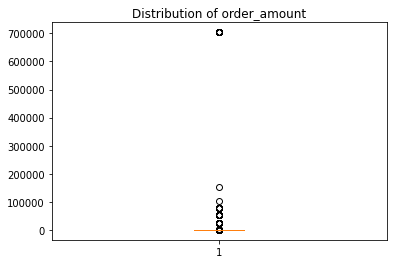

In [6]:
plt.boxplot(df.order_amount)
plt.title("Distribution of order_amount")
plt.show()

Some orders with especially high order amounts are skewing the distribution. These orders were likely to be bulk orders or consisted of luxury sneakers that are significantly pricier than the average pair of sneakers.

In [7]:
order_amount_array = df['order_amount'].unique()
print(order_amount_array)

[704000 154350 102900  77175  51450  25725   1760   1408   1086   1064
   1056    980    965    960    948    935    920    890    885    880
    865    845    830    816    815    810    805    804    800    790
    786    784    780    774    772    765    760    748    745    740
    736    735    730    725    724    712    710    708    704    692
    684    676    672    670    665    664    660    656    655    652
    650    648    645    644    640    632    624    620    616    612
    603    596    592    590    588    585    584    580    579    576
    570    568    561    560    552    544    543    536    534    532
    531    528    524    520    519    516    513    512    508    507
    504    498    495    492    489    488    486    483    480    474
    472    470    468    465    464    462    459    456    450    448
    447    444    441    438    435    432    426    420    414    408
    404    402    399    396    393    392    390    387    386    384
    38

In actuality, as revealed by looking at the quantiles, 75% of orders made in the 30-day period were lower than 390.

In [9]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

If we look at the distribution of orders below 10000, we notice that most orders have 5 or less items and the total order value is below $1000.

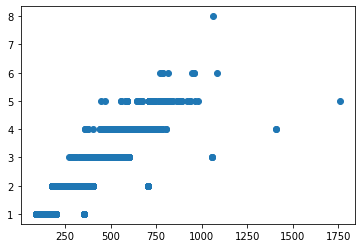

In [10]:
orders_below_10000 = df[df.order_amount < 10000]
plt.scatter(orders_below_10000['order_amount'], orders_below_10000['total_items'])

If we look at AOV of orders that had an order amount below 10,000, the AOV is $302.58, which is 10 times smaller than the original AOV.

In [11]:
print(orders_below_10000['order_amount'].mean())

302.58051448247926


A better way to evaluate this data is to separate large wholesale orders and luxury sneaker shop orders from the orders of average sneakers.

## Question 1b & 1c

There are many metrics we can use to report this dataset. One of them is the AOV by shop.

In [32]:
df_shop_id = df.groupby("shop_id").agg({"order_amount":sum, "total_items":sum})
order_count = df.groupby("shop_id").size().reset_index(name = "order_count")
df_by_shop = pd.merge(df_shop_id, order_count, how="outer", on="shop_id")
df_by_shop = df_by_shop.reindex(columns=["shop_id","order_amount", "total_items", "order_count"])
df_by_shop["AOV"] = (df_by_shop["order_amount"] / df_by_shop["order_count"]).round(decimals = 2)
df_by_shop["unit_price"] = df_by_shop["order_amount"] / df_by_shop["total_items"]

By sorting the AOV in descending order, we can observe that most shops' AOV are below 600 dollars.

In [44]:
df_by_shop = df_by_shop.sort_values(by = ["AOV"], ascending = False)
df_by_shop.head()

,shop_id,order_amount,total_items,order_count,AOV,unit_price
41,42,11990176,34063,51,235101.49,352.0
77,78,2263800,88,46,49213.04,25725.0
49,50,17756,92,44,403.55,193.0
89,90,19758,111,49,403.22,178.0
37,38,13680,72,35,390.86,190.0


**The median of the AOV for the 100 stores is 308.99 dollars**, which is actually close to the AOV for stores that had order amounts under 10000 dollars. This indicates that the median is a better metric in this scenario because of the existence of the few outliers.

In [43]:
df_by_shop["AOV"].median()

308.89

And if we sort by ```unit_price``` in descending order, we notice that only one store sells sneakers at an absurd amount. 

In [39]:
df_by_shop = df_by_shop.sort_values(by = ["unit_price"], ascending = False)
df_by_shop.head()

,shop_id,order_amount,total_items,order_count,AOV,unit_price
77,78,2263800,88,46,49213.04,25725.0
41,42,11990176,34063,51,235101.49,352.0
11,12,18693,93,53,352.70,201.0
88,89,23128,118,61,379.15,196.0
98,99,18330,94,54,339.44,195.0


The one outlier for unit price would have a huge effect on the mean. Therefore, I choose to report the median instead. The median unit price per sneaker among the 100 stores is 153 dollars. This is important because in this case we can better understand how the sneaker sellers are pricing its shoes and the type of consumers they are targeting.

In [40]:
df_by_shop["unit_price"].median()

153.0

**We can also consider the daily sales.**
First we extract the date from the ```created_at``` attribute.

In [54]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["date"] = df["created_at"].dt.date
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,date
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,2017-03-12
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00,2017-03-24
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,2017-03-02
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,2017-03-17
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,2017-03-04


We then use ```group by``` and ```merge``` to find out how many orders were made and how much revenue was generated on each day.

In [64]:
df_daily_sales = df.groupby("date").agg({"order_amount":sum, "total_items":sum})
daily_orders = df.groupby("date").size().reset_index(name = "order_count")
df_daily_sales = pd.merge(df_daily_sales, daily_orders, how="inner", on="date")
df_daily_sales.head()

,date,order_amount,total_items,order_count
0,2017-03-01,106154,359,182
1,2017-03-02,1588109,4351,182
2,2017-03-03,48729,324,162
3,2017-03-04,855504,2313,165
4,2017-03-05,126293,320,163


On average, 166 orders were made per day.

In [65]:
df_daily_sales["order_count"].describe()

count     30.000000
mean     166.666667
std       15.095862
min      143.000000
25%      156.500000
50%      166.000000
75%      175.000000
max      199.000000
Name: order_count, dtype: float64

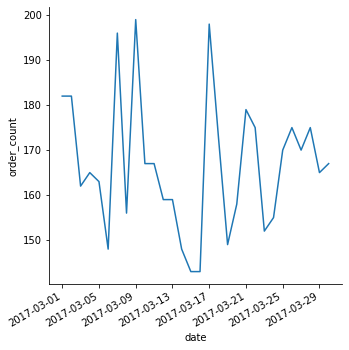

In [75]:
g = sns.relplot(x="date", y="order_count", kind="line", data=df_daily_sales)
g.figure.autofmt_xdate()

Exploring daily orders allows us to better understand consumer purchase behavior and allows us to further explore why certain days during the month experience more growth or dips. Moreover, we can also compare daily sales data from the month of March to other months to see whether the ups and downs correspond. 